# Image Classification with CNNs

In this notebook, we will build a Convolutional Neural Network (CNN) using Keras to classify images from the Digits dataset. CNNs are particularly well-suited for image data and are commonly used in computer vision tasks due to their ability to capture spatial hierarchies in images.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Set style and context
sns.set(style='whitegrid', context='notebook')

In [ ]:
# Load the Digits dataset
digits = load_digits()
X = digits.images
y = digits.target

# Reshape the data to add a channel dimension
X = X.reshape(-1, 8, 8, 1)

# Normalize the feature data
X = X / 16.0  # Pixel values are between 0 and 16

# One-hot encode the target variable
y_encoded = to_categorical(y, num_classes=10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
def build_cnn_model(input_shape):
    """
    Build a CNN model using Keras Sequential API.

    Parameters:
    - input_shape: Shape of the input data (height, width, channels)

    Returns:
    - model: Compiled CNN model
    """
    model = Sequential()

    # Convolutional Layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    # Max Pooling Layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the feature maps into 1D
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(64, activation='relu'))

    # Output Layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Build the model
input_shape = (8, 8, 1)
cnn_model = build_cnn_model(input_shape)

# Print the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 6, 6, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,466 (76.04 KB)

 Trainable params: 19,466 (76.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.3115 - loss: 2.1762 - val_accuracy: 0.7139 - val_loss: 1.6956
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7488 - loss: 1.4815 - val_accuracy: 0.8694 - val_loss: 0.8400
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8736 - loss: 0.7073 - val_accuracy: 0.9056 - val_loss: 0.4531
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8857 - loss: 0.4543 - val_accuracy: 0.9222 - val_loss: 0.3118
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9235 - loss: 0.2998 - val_accuracy: 0.9278 - val_loss: 0.2708
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9460 - loss: 0.2419 - val_accuracy: 0.9444 - val_loss: 0.2015
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9433 - loss: 0.2070 - val_accuracy: 0.9417 - val_loss: 0.1810
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9586 - loss: 0.1790 - val_accuracy: 0.9417 - val_lo

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 97.22%


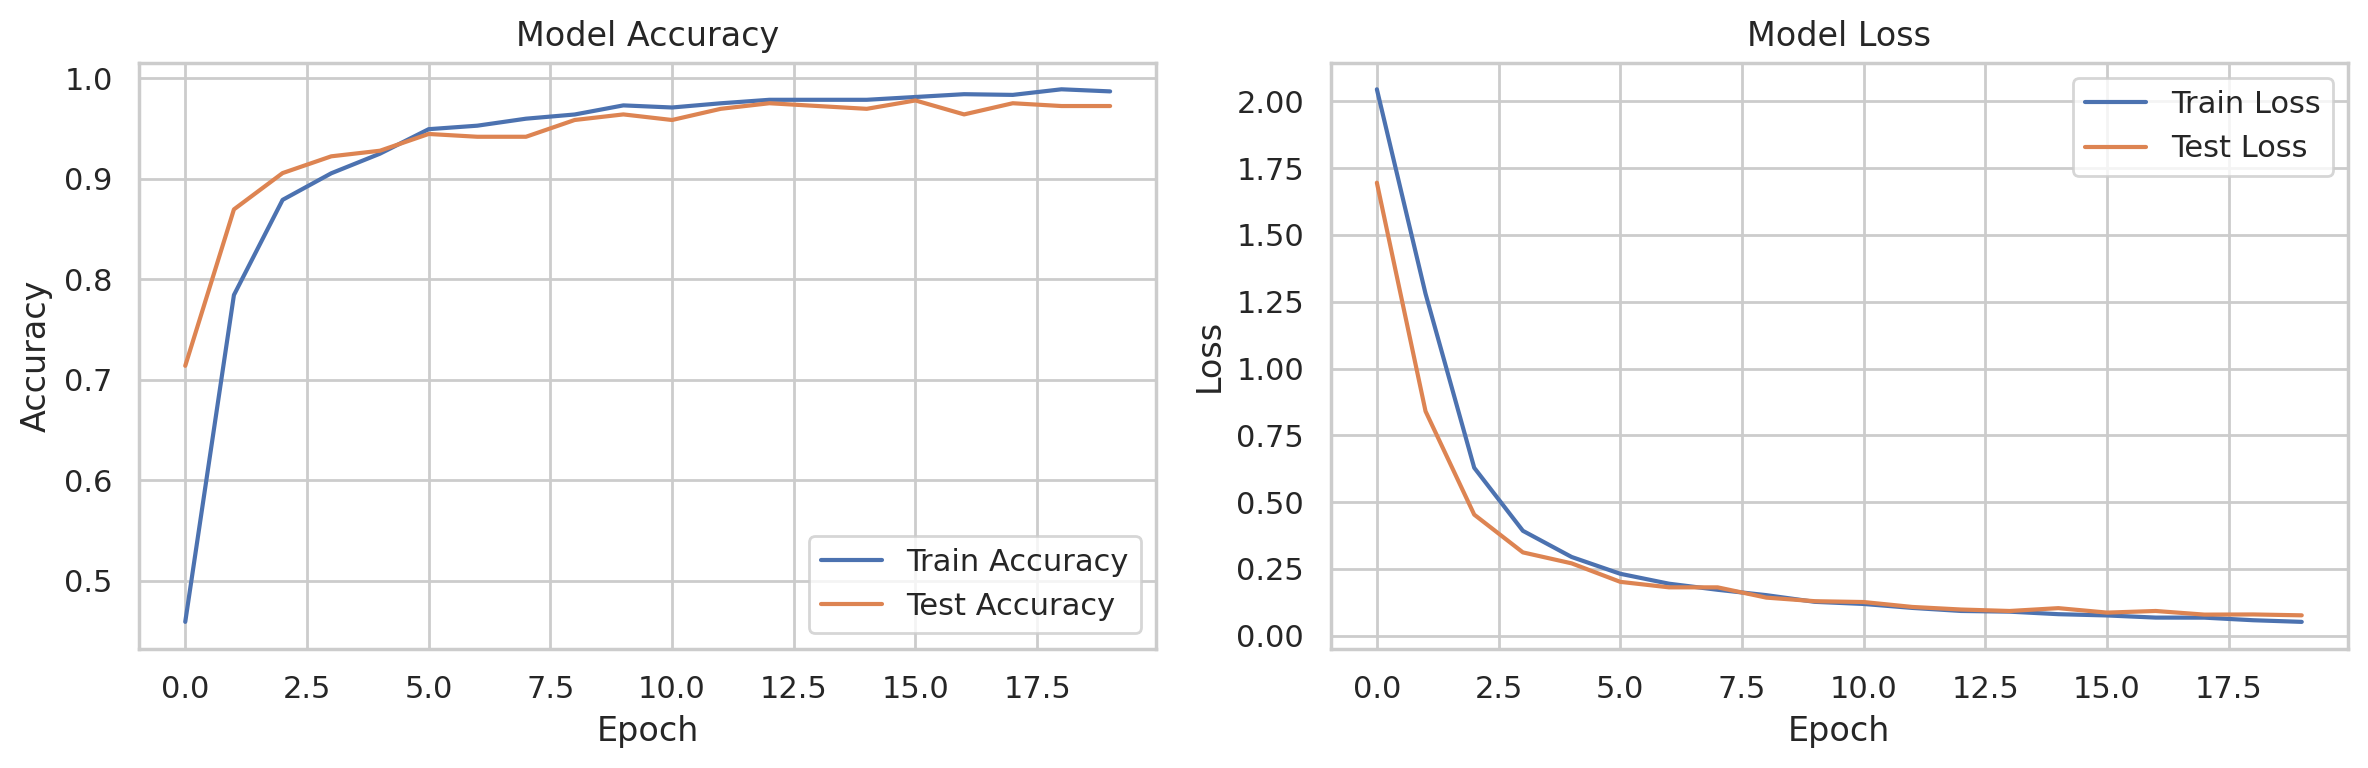

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4), dpi=200)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Exercise

Use the CNN architecture implemented for the Digits dataset on the CIFAR-10 dataset. Then, apply methods to improve its performance.

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the images to have pixel values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


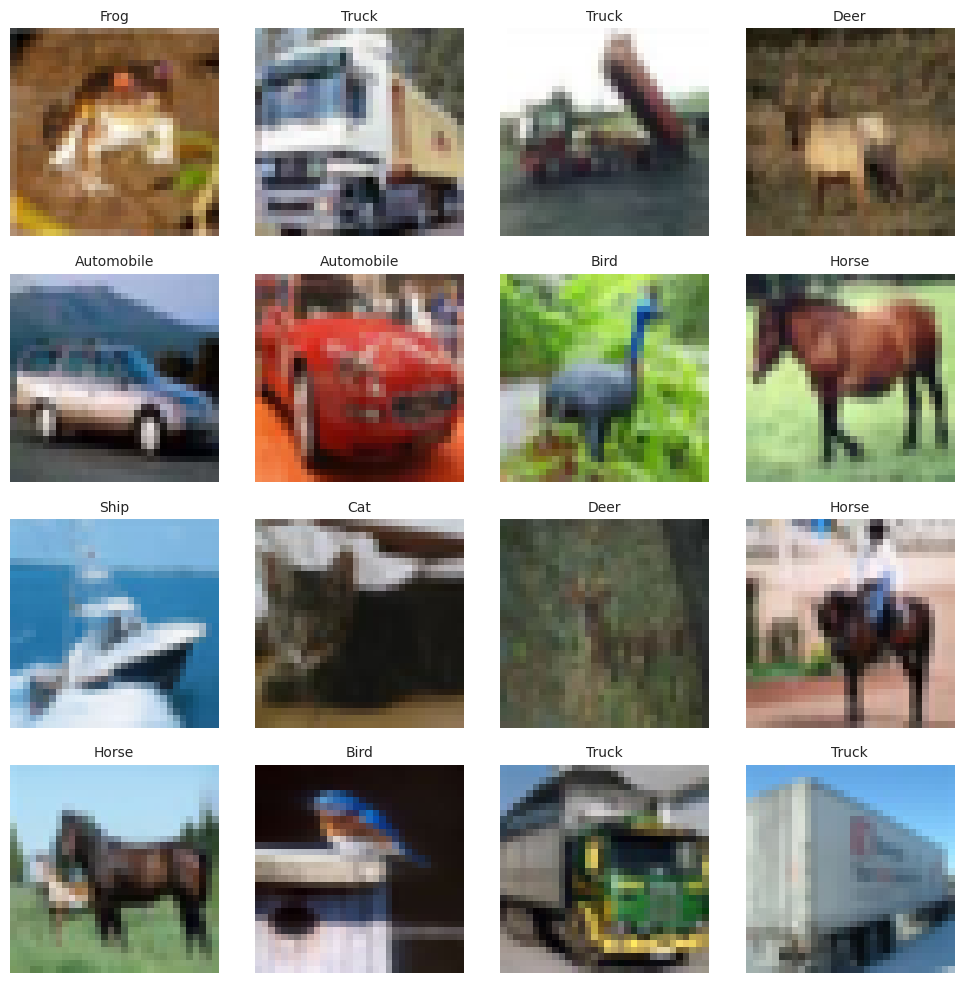

In [ ]:
# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to plot a grid of CIFAR-10 images with their ground truth labels
def plot_cifar_images(X, y, num_images=16):
    """
    Plot a grid of CIFAR-10 images with their ground truth labels.

    Parameters:
    - X: Feature data (images)
    - y: Labels (ground truth)
    - num_images: Number of images to display (default is 16)
    """
    plt.figure(figsize=(10, 10))
    images_per_row = int(np.sqrt(num_images))
    for i in range(num_images):
        plt.subplot(images_per_row, images_per_row, i + 1)
        plt.imshow(X[i])
        true_label = np.argmax(y[i])
        plt.title(class_names[true_label], fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot a subset of the training data
num_images_to_plot = 16
X_plot = X_train[:num_images_to_plot]
y_plot = y_train[:num_images_to_plot]

# Plot CIFAR-10 images with ground truth labels
plot_cifar_images(X_plot, y_plot, num_images=num_images_to_plot)